## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OneHotEncoder

## Loading dataset

In [ ]:
df = pd.read_csv('crop recommendation.csv')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df

,Place,pH,pH (Cls),EC,EC (Cls),OC,OC (Cls),N,N (Cls),P,P (Cls),K,K( Cls),S,S (Cls),Zn,Zn (Cls),Fe,Fe (Cls),Cu,Cu( Cls),Mn,Mn (Cls),B,B( C ls),Suitable crop
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,coonoor,5.2,HAc,0.36,N,1.17,VH,7.0,VL,33.0,M,320.0,M,13.0,S,0.63,S,15.18,S,0.98,S,6.12,S,12.0,S,potato
2,coonoor,4.8,HAc,0.33,N,1.03,VH,NaN,NaN,16.0,L,138.0,L,7.5,D,2.04,S,27.38,S,1.86,S,18.37,S,2.0,S,potato
3,coonoor,5.1,HAc,0.46,N,0.45,L,113.4,VL,33.0,M,310.0,M,13.0,S,0.65,S,15.80,S,1.10,S,7.26,S,12.0,S,potato
4,coonoor,5.4,HAc,0.54,N,0.69,M,92.4,VL,52.0,M,260.0,M,13.0,S,0.96,S,16.20,S,1.22,S,7.24,S,12.0,S,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,ooty,7.4,MAl,0.25,N,0.54,M,308.0,M,67.0,H,617.0,H,20.0,S,3.68,S,19.34,S,0.80,S,2.38,S,2.6,S,beetroot
1719,ooty,6.6,SlAc,0.27,N,1.30,VH,27.0,VL,49.0,M,164.0,M,25.0,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1720,ooty,6.6,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1721,ooty,6.3,MAc,0.21,N,1.08,VH,190.0,L,94.0,VH,419.0,H,5.0,D,1.48,S,20.14,S,0.53,S,2.67,S,0.5,D,beetroot


* First row is empty. Droping the first row using pandas drop method

In [ ]:
df = df.drop([0])
df

,Place,pH,pH (Cls),EC,EC (Cls),OC,OC (Cls),N,N (Cls),P,P (Cls),K,K( Cls),S,S (Cls),Zn,Zn (Cls),Fe,Fe (Cls),Cu,Cu( Cls),Mn,Mn (Cls),B,B( C ls),Suitable crop
1,coonoor,5.2,HAc,0.36,N,1.17,VH,7.0,VL,33.0,M,320.0,M,13.0,S,0.63,S,15.18,S,0.98,S,6.12,S,12.0,S,potato
2,coonoor,4.8,HAc,0.33,N,1.03,VH,NaN,NaN,16.0,L,138.0,L,7.5,D,2.04,S,27.38,S,1.86,S,18.37,S,2.0,S,potato
3,coonoor,5.1,HAc,0.46,N,0.45,L,113.4,VL,33.0,M,310.0,M,13.0,S,0.65,S,15.80,S,1.10,S,7.26,S,12.0,S,potato
4,coonoor,5.4,HAc,0.54,N,0.69,M,92.4,VL,52.0,M,260.0,M,13.0,S,0.96,S,16.20,S,1.22,S,7.24,S,12.0,S,potato
5,coonoor,5.2,HAc,0.52,N,0.90,H,75.6,VL,65.0,H,300.0,M,13.0,S,0.82,S,16.92,S,0.82,S,6.60,S,12.0,S,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,ooty,7.4,MAl,0.25,N,0.54,M,308.0,M,67.0,H,617.0,H,20.0,S,3.68,S,19.34,S,0.80,S,2.38,S,2.6,S,beetroot
1719,ooty,6.6,SlAc,0.27,N,1.30,VH,27.0,VL,49.0,M,164.0,M,25.0,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1720,ooty,6.6,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1721,ooty,6.3,MAc,0.21,N,1.08,VH,190.0,L,94.0,VH,419.0,H,5.0,D,1.48,S,20.14,S,0.53,S,2.67,S,0.5,D,beetroot


In [ ]:
df[df['Suitable crop']=='potato'].count()

Place            838
pH               838
pH (Cls)         838
EC               838
EC (Cls)         838
OC               834
OC (Cls)         834
N                824
N (Cls)          824
P                827
P (Cls)          827
K                826
K( Cls)          826
S                826
S (Cls)          826
Zn               824
Zn (Cls)         824
Fe               824
Fe (Cls)         824
Cu               820
Cu( Cls)         820
Mn               802
Mn (Cls)         802
B                824
B( C ls)         824
Suitable crop    838
dtype: int64

In [ ]:
df[df['Suitable crop']=='carrot'].count()

Place            420
pH               420
pH (Cls)         420
EC               420
EC (Cls)         420
OC               418
OC (Cls)         418
N                413
N (Cls)          413
P                420
P (Cls)          420
K                420
K( Cls)          420
S                420
S (Cls)          420
Zn               420
Zn (Cls)         420
Fe               420
Fe (Cls)         420
Cu               419
Cu( Cls)         419
Mn               410
Mn (Cls)         410
B                420
B( C ls)         420
Suitable crop    420
dtype: int64

In [ ]:
df[df['Suitable crop']=='cabbage'].count()

Place            134
pH               134
pH (Cls)         134
EC               134
EC (Cls)         134
OC               133
OC (Cls)         133
N                127
N (Cls)          127
P                132
P (Cls)          132
K                132
K( Cls)          132
S                131
S (Cls)          131
Zn               130
Zn (Cls)         130
Fe               130
Fe (Cls)         130
Cu               130
Cu( Cls)         130
Mn               124
Mn (Cls)         124
B                130
B( C ls)         130
Suitable crop    134
dtype: int64

In [ ]:
df[df['Suitable crop']=='beetroot'].count()

Place            330
pH               330
pH (Cls)         330
EC               330
EC (Cls)         330
OC               328
OC (Cls)         328
N                319
N (Cls)          319
P                327
P (Cls)          327
K                327
K( Cls)          327
S                326
S (Cls)          326
Zn               325
Zn (Cls)         325
Fe               325
Fe (Cls)         325
Cu               323
Cu( Cls)         323
Mn               318
Mn (Cls)         318
B                325
B( C ls)         325
Suitable crop    330
dtype: int64

* dropping duplicate rows

In [ ]:
df = df.drop_duplicates()
df

,Place,pH,pH (Cls),EC,EC (Cls),OC,OC (Cls),N,N (Cls),P,P (Cls),K,K( Cls),S,S (Cls),Zn,Zn (Cls),Fe,Fe (Cls),Cu,Cu( Cls),Mn,Mn (Cls),B,B( C ls),Suitable crop
1,coonoor,5.2,HAc,0.36,N,1.17,VH,7.0,VL,33.0,M,320.0,M,13.0,S,0.63,S,15.18,S,0.98,S,6.12,S,12.0,S,potato
2,coonoor,4.8,HAc,0.33,N,1.03,VH,NaN,NaN,16.0,L,138.0,L,7.5,D,2.04,S,27.38,S,1.86,S,18.37,S,2.0,S,potato
3,coonoor,5.1,HAc,0.46,N,0.45,L,113.4,VL,33.0,M,310.0,M,13.0,S,0.65,S,15.80,S,1.10,S,7.26,S,12.0,S,potato
4,coonoor,5.4,HAc,0.54,N,0.69,M,92.4,VL,52.0,M,260.0,M,13.0,S,0.96,S,16.20,S,1.22,S,7.24,S,12.0,S,potato
5,coonoor,5.2,HAc,0.52,N,0.90,H,75.6,VL,65.0,H,300.0,M,13.0,S,0.82,S,16.92,S,0.82,S,6.60,S,12.0,S,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,ooty,7.4,MAl,0.25,N,0.54,M,308.0,M,67.0,H,617.0,H,20.0,S,3.68,S,19.34,S,0.80,S,2.38,S,2.6,S,beetroot
1719,ooty,6.6,SlAc,0.27,N,1.30,VH,27.0,VL,49.0,M,164.0,M,25.0,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1720,ooty,6.6,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,beetroot
1721,ooty,6.3,MAc,0.21,N,1.08,VH,190.0,L,94.0,VH,419.0,H,5.0,D,1.48,S,20.14,S,0.53,S,2.67,S,0.5,D,beetroot


## Splitting data into train and test dataframe 

In [ ]:
df_train, df_test = train_test_split(df)

print(
    f'The training data has {df_train.shape[0]} rows and {df_train.shape[1]} columns\n')

print(
    f'The test data has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The training data has 1245 rows and 26 columns

The test data has 415 rows and 26 columns


## EDA

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 1391 to 64
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Place          1245 non-null   object 
 1   pH             1245 non-null   float64
 2   pH (Cls)       1245 non-null   object 
 3   EC             1245 non-null   float64
 4   EC (Cls)       1245 non-null   object 
 5   OC             1238 non-null   float64
 6   OC (Cls)       1238 non-null   object 
 7   N              1215 non-null   float64
 8   N (Cls)        1215 non-null   object 
 9   P              1232 non-null   float64
 10  P (Cls)        1232 non-null   object 
 11  K              1231 non-null   float64
 12  K( Cls)        1231 non-null   object 
 13  S              1229 non-null   float64
 14  S (Cls)        1229 non-null   object 
 15  Zn             1225 non-null   float64
 16  Zn (Cls)       1225 non-null   object 
 17  Fe             1225 non-null   float64
 18  Fe (Cls

In [ ]:
categorical_features = df_train.select_dtypes(include=['object'])

numerical_features = df_train.select_dtypes(exclude=['object'])

In [ ]:
for col in df_train[categorical_features.columns]:
    print(f'{col} :{df_train[col].unique()} \n')

Place :['ooty' 'coonoor' 'gudalur'] 

pH (Cls)  :['SlAc' 'MAc ' ' HAc' 'MAl ' 'N   '] 

EC (Cls)  :['N   ' 'ITC ' 'HTCG'] 

OC (Cls)  :[nan 'VH' 'H ' 'L ' 'M ' 'VL'] 

N (Cls)  :[nan 'VH' 'VL' 'M ' 'L ' 'H '] 

P (Cls)  :[nan 'VH' 'H ' 'M ' 'L ' 'VL'] 

K( Cls)  :[nan 'H ' 'M ' 'L ' 'VH' 'VL'] 

S (Cls)  :[nan 'D' 'S'] 

Zn (Cls)  :[nan 'S' 'D'] 

Fe (Cls)  :[nan 'D' 'S'] 

Cu( Cls)  :[nan 'S' 'D'] 

Mn (Cls)  :[nan 'D' 'S'] 

B( C ls)  :[nan 'D' 'S'] 

Suitable crop :['cabbage' 'carrot' 'potato' 'beetroot'] 



In [ ]:
for col in df_train[numerical_features.columns]:
    print(f'{col} :{df_train[col].unique()} \n')

pH :[6.6   6.7   6.1   5.3   5.1   6.8   4.9   6.    6.3   5.    6.4   5.2
 5.4   4.8   5.15  7.1   5.16  6.5   6.2   6.9   7.5   7.    5.17  7.4
 6.659 4.93  7.2   6.68  6.69  6.63  6.74  5.14  6.23  7.3   6.73  6.75
 6.91  6.81  5.34  6.51  6.45  5.37  5.03  6.05  6.53  5.32  5.05 ] 

EC :[0.    0.12  0.04  0.01  0.3   0.34  0.14  4.6   0.21  0.15  0.17  0.06
 0.13  0.24  0.44  0.2   0.62  0.64  0.19  0.37  0.23  0.4   0.36  0.35
 0.08  0.157 0.59  0.11  0.52  0.05  0.22  0.16  0.09  0.1   0.03  0.26
 0.18  0.42  0.33  0.79  0.9   0.63  0.89  0.32  0.07  0.39  0.46  0.27
 0.48  0.31  0.38  0.108 0.02  0.43  0.54  0.28  0.47  0.41  0.66  0.75
 1.88  0.25  0.71  0.76  0.84  0.45  0.5   0.65  0.29  0.58  0.214 0.016
 0.57  0.109 0.56  0.49  0.107 0.87  0.258 0.8   0.097 0.67  0.6   0.68
 0.88  0.141 2.9   0.51 ] 

OC :[     nan 1.05e+00 9.30e-01 4.90e-01 1.58e+00 3.40e-01 7.50e-01 7.20e-01
 1.50e+00 1.08e+00 1.14e+00 5.50e-01 1.62e+00 7.00e-01 1.47e+00 1.55e+00
 9.00e-01 6.00e-01 6.60e-

In [ ]:
df_train.columns

Index(['Place', 'pH', 'pH (Cls) ', 'EC', 'EC (Cls) ', 'OC', 'OC (Cls) ', 'N',
       'N (Cls) ', 'P', 'P (Cls) ', 'K', 'K( Cls) ', 'S', 'S (Cls) ', 'Zn',
       'Zn (Cls) ', 'Fe', 'Fe (Cls) ', 'Cu', 'Cu( Cls) ', 'Mn', 'Mn (Cls) ',
       'B', 'B( C ls) ', 'Suitable crop'],
      dtype='object')

## 1. renaming column names

In [ ]:
df_train = df_train.rename(columns={'Place': 'place', 'pH': 'ph','pH (Cls) ':'ph_cls', 'EC':'ec', 'EC (Cls) ':'ec_cls', 'OC':'oc', 'OC (Cls) ':'oc_cls', 'N':'n',
       'N (Cls) ': 'n_cls', 'P':'p', 'P (Cls) ':'p_cls', 'K':'k', 'K( Cls) ':'k_cls', 'S':'s', 'S (Cls) ':'s_cls', 'Zn':'zn',
       'Zn (Cls) ':'zn_cls', 'Fe':'fe', 'Fe (Cls) ':'fe_cls', 'Cu':'cu', 'Cu( Cls) ':'cu_cls', 'Mn':'mn', 'Mn (Cls) ':'mn_cls',
       'B':'b', 'B( C ls) ':'b_cls', 'Suitable crop':'crop'})

In [ ]:
df_train

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1391,ooty,6.6,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cabbage
1267,coonoor,6.7,SlAc,0.12,N,1.05,VH,1086.7,VH,111.0,VH,598.9,H,7.5,D,0.94,S,0.75,D,0.71,S,0.51,D,0.5,D,cabbage
1343,coonoor,6.6,SlAc,0.04,N,0.93,H,121.0,VL,148.0,VH,167.0,M,7.5,D,0.74,S,3.94,D,0.20,D,0.18,D,0.5,D,cabbage
1157,coonoor,6.1,MAc,0.01,N,0.49,L,81.2,VL,87.0,H,94.0,L,5.0,D,0.86,S,32.40,S,0.94,S,5.16,S,0.2,D,carrot
238,coonoor,5.3,HAc,0.30,N,1.58,VH,366.5,M,148.0,VH,333.0,M,12.5,S,0.14,D,1.28,D,0.22,S,0.96,D,0.2,D,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,6.7,SlAc,0.65,N,2.40,VH,700.3,VH,1259.0,VH,80.0,L,0.2,D,0.80,S,9.91,S,6.33,S,1.15,D,0.2,D,cabbage
749,ooty,5.0,HAc,0.21,N,0.60,M,339.0,M,81.0,H,346.0,H,13.0,S,0.36,D,8.38,S,1.62,S,9.47,S,0.5,D,potato
608,gudalur,5.0,HAc,0.11,N,0.42,L,88.0,VL,25.0,M,265.0,M,5.0,D,1.46,S,81.76,S,2.63,S,9.32,S,1.2,S,potato
1213,ooty,6.1,MAc,0.28,N,0.87,H,470.0,M,67.0,H,228.0,M,13.0,S,1.26,S,15.62,S,0.68,S,1.28,D,0.2,D,carrot


In [ ]:
df_train.describe()

,ph,ec,oc,n,p,k,s,zn,fe,cu,mn,b
count,1245.000000,1245.000000,1238.000000,1215.000000,1232.000000,1231.000000,1229.000000,1225.000000,1225.000000,1219.000000,1194.000000,1225.000000
mean,5.801757,0.204257,0.826805,253.117653,98.585703,357.976194,12.434022,1.424799,18.316125,1.189477,7.778598,1.875306
std,0.744067,0.224752,2.217198,257.074450,113.627465,277.869206,19.401830,3.232764,21.639173,1.373689,28.373255,5.266325
min,4.800000,0.000000,0.000000,0.180000,0.380000,0.200000,0.180000,0.010000,0.021000,0.000000,0.022000,0.010000
25%,5.100000,0.080000,0.420000,114.800000,25.000000,167.000000,7.500000,0.520000,4.280000,0.540000,1.280000,0.200000
50%,6.000000,0.140000,0.720000,183.200000,62.000000,272.000000,7.500000,0.860000,11.000000,0.860000,3.215000,0.500000
75%,6.400000,0.260000,1.047500,273.100000,136.000000,469.000000,13.000000,1.170000,22.040000,1.220000,7.140000,0.800000
max,7.500000,4.600000,77.000000,2214.000000,1452.000000,1235.000000,394.000000,64.000000,324.000000,15.960000,510.000000,62.500000


In [ ]:
categorical_features = df_train.select_dtypes(include=['object'])

numerical_features = df_train.select_dtypes(exclude=['object'])
numerical_features

,ph,ec,oc,n,p,k,s,zn,fe,cu,mn,b
1391,6.6,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1267,6.7,0.12,1.05,1086.7,111.0,598.9,7.5,0.94,0.75,0.71,0.51,0.5
1343,6.6,0.04,0.93,121.0,148.0,167.0,7.5,0.74,3.94,0.20,0.18,0.5
1157,6.1,0.01,0.49,81.2,87.0,94.0,5.0,0.86,32.40,0.94,5.16,0.2
238,5.3,0.30,1.58,366.5,148.0,333.0,12.5,0.14,1.28,0.22,0.96,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,6.7,0.65,2.40,700.3,1259.0,80.0,0.2,0.80,9.91,6.33,1.15,0.2
749,5.0,0.21,0.60,339.0,81.0,346.0,13.0,0.36,8.38,1.62,9.47,0.5
608,5.0,0.11,0.42,88.0,25.0,265.0,5.0,1.46,81.76,2.63,9.32,1.2
1213,6.1,0.28,0.87,470.0,67.0,228.0,13.0,1.26,15.62,0.68,1.28,0.2


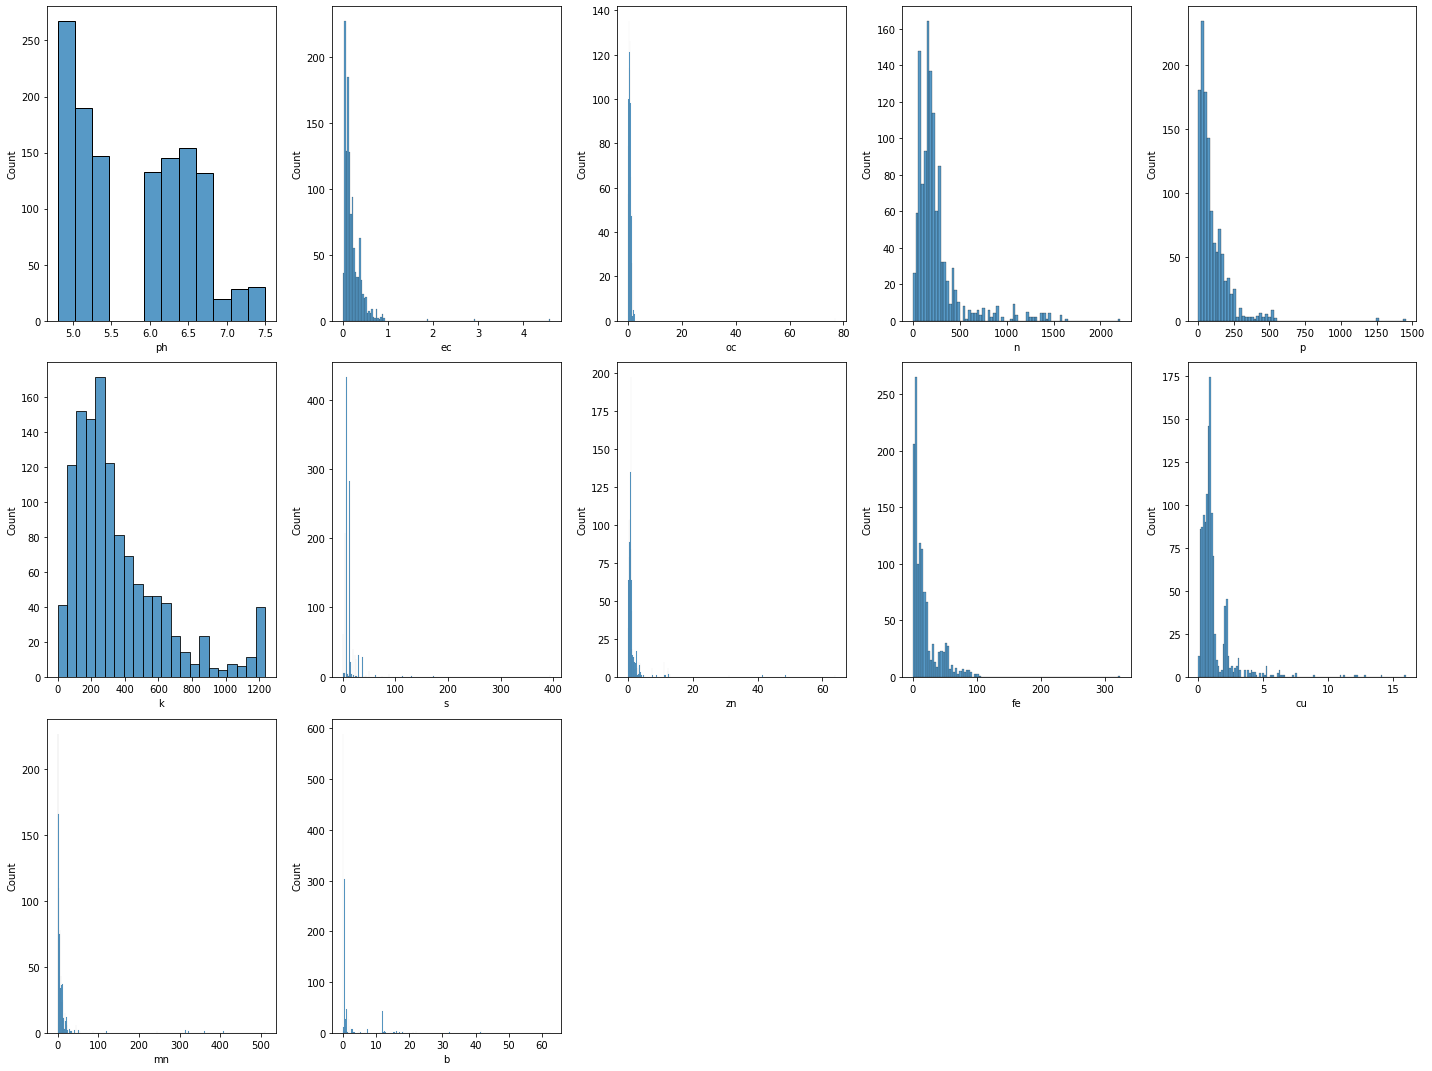

In [ ]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 13:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df_train[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
categorical_features

,place,ph_cls,ec_cls,oc_cls,n_cls,p_cls,k_cls,s_cls,zn_cls,fe_cls,cu_cls,mn_cls,b_cls,crop
1391,ooty,SlAc,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cabbage
1267,coonoor,SlAc,N,VH,VH,VH,H,D,S,D,S,D,D,cabbage
1343,coonoor,SlAc,N,H,VL,VH,M,D,S,D,D,D,D,cabbage
1157,coonoor,MAc,N,L,VL,H,L,D,S,S,S,S,D,carrot
238,coonoor,HAc,N,VH,M,VH,M,S,D,D,S,D,D,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,SlAc,N,VH,VH,VH,L,D,S,S,S,D,D,cabbage
749,ooty,HAc,N,M,M,H,H,S,D,S,S,S,D,potato
608,gudalur,HAc,N,L,VL,M,M,D,S,S,S,S,S,potato
1213,ooty,MAc,N,H,M,H,M,S,S,S,S,D,D,carrot


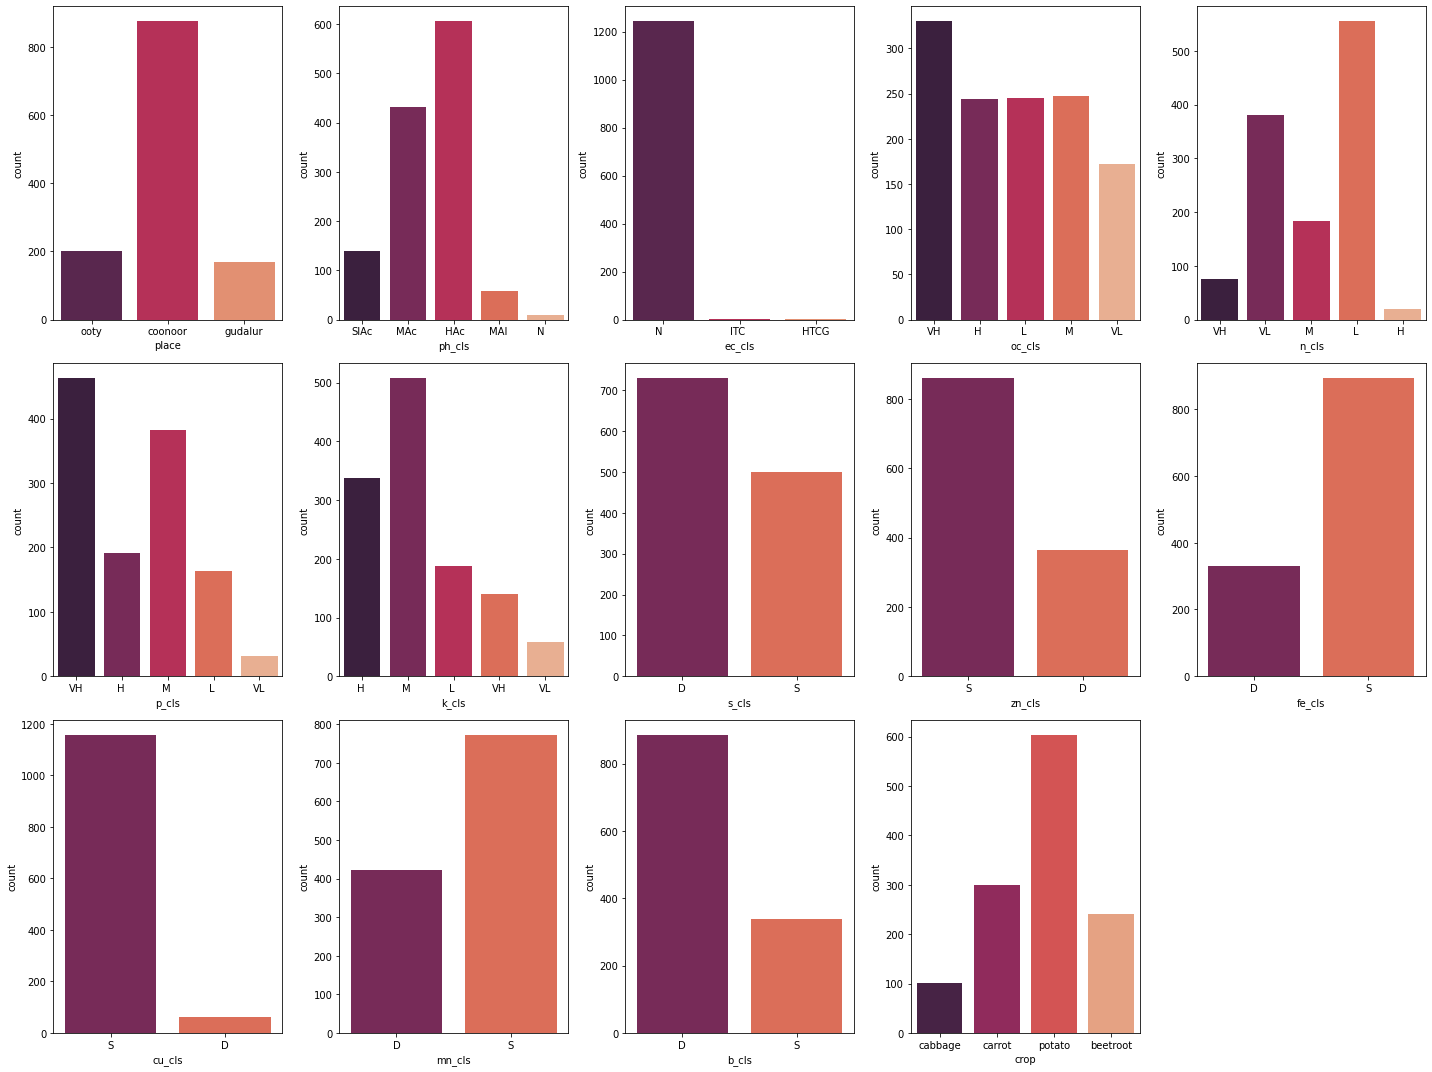

In [ ]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in categorical_features:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(x=df_train[column], palette='rocket')
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df_train['crop'].unique()

array(['cabbage', 'carrot', 'potato', 'beetroot'], dtype=object)

## 2. changing dependent categorical val to numerical values

In [ ]:
df_train['crop'] = df_train['crop'].map({'potato':0, 'carrot':1, 'beetroot':2, 'cabbage':3})
df_train

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1391,ooty,6.6,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1267,coonoor,6.7,SlAc,0.12,N,1.05,VH,1086.7,VH,111.0,VH,598.9,H,7.5,D,0.94,S,0.75,D,0.71,S,0.51,D,0.5,D,3
1343,coonoor,6.6,SlAc,0.04,N,0.93,H,121.0,VL,148.0,VH,167.0,M,7.5,D,0.74,S,3.94,D,0.20,D,0.18,D,0.5,D,3
1157,coonoor,6.1,MAc,0.01,N,0.49,L,81.2,VL,87.0,H,94.0,L,5.0,D,0.86,S,32.40,S,0.94,S,5.16,S,0.2,D,1
238,coonoor,5.3,HAc,0.30,N,1.58,VH,366.5,M,148.0,VH,333.0,M,12.5,S,0.14,D,1.28,D,0.22,S,0.96,D,0.2,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,6.7,SlAc,0.65,N,2.40,VH,700.3,VH,1259.0,VH,80.0,L,0.2,D,0.80,S,9.91,S,6.33,S,1.15,D,0.2,D,3
749,ooty,5.0,HAc,0.21,N,0.60,M,339.0,M,81.0,H,346.0,H,13.0,S,0.36,D,8.38,S,1.62,S,9.47,S,0.5,D,0
608,gudalur,5.0,HAc,0.11,N,0.42,L,88.0,VL,25.0,M,265.0,M,5.0,D,1.46,S,81.76,S,2.63,S,9.32,S,1.2,S,0
1213,ooty,6.1,MAc,0.28,N,0.87,H,470.0,M,67.0,H,228.0,M,13.0,S,1.26,S,15.62,S,0.68,S,1.28,D,0.2,D,1


Text(0.5, 1.0, 'Correlations between different predictors')

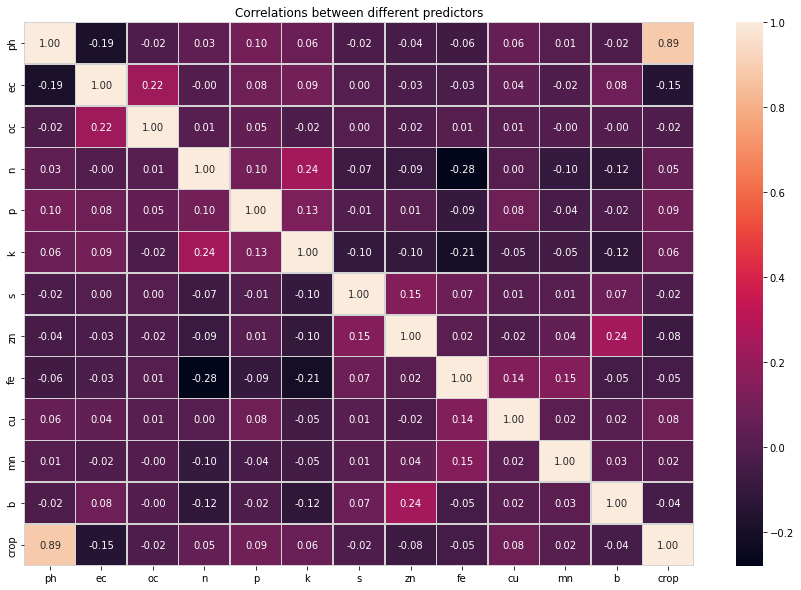

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(df_train.corr(), annot=True, linecolor='lightgrey',
            fmt='.2f', ax=ax, linewidths=.5)
plt.title('Correlations between different predictors')

In [ ]:
categorical_features = df_train.select_dtypes(include=['object'])
numerical_features = df_train.select_dtypes(exclude=['object'])

In [ ]:
((numerical_features.isnull().mean())*100).sort_values(ascending=False)

mn      4.096386
n       2.409639
cu      2.088353
zn      1.606426
fe      1.606426
b       1.606426
s       1.285141
k       1.124498
p       1.044177
oc      0.562249
ph      0.000000
ec      0.000000
crop    0.000000
dtype: float64

## 3. checking and handling null values

In [ ]:
df_train.isnull().sum()

place      0
ph         0
ph_cls     0
ec         0
ec_cls     0
oc         7
oc_cls     7
n         30
n_cls     30
p         13
p_cls     13
k         14
k_cls     14
s         16
s_cls     16
zn        20
zn_cls    20
fe        20
fe_cls    20
cu        26
cu_cls    26
mn        51
mn_cls    51
b         20
b_cls     20
crop       0
dtype: int64

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1391,ooty,6.60,SlAc,0.00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
692,ooty,5.15,HAc,0.35,N,0.84,H,NaN,NaN,33.00,M,146.0,M,37.5,S,31.24,S,30.10,S,2.32,S,7.26,S,2.0,S,0
1002,coonoor,6.50,MAc,0.14,N,1.55,VH,193.60,L,12.00,L,148.0,M,7.5,D,0.84,S,15.20,S,0.82,S,NaN,NaN,0.2,D,1
387,coonoor,5.30,HAc,0.09,N,0.55,M,190.10,L,12.00,L,210.0,M,7.5,D,0.92,S,1.79,D,0.22,S,NaN,NaN,0.2,D,0
544,gudalur,5.30,HAc,0.15,N,NaN,NaN,0.54,VL,145.73,VH,513.0,H,38.0,S,3.08,S,32.06,S,1.45,S,19.16,S,1.6,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,gudalur,5.20,HAc,0.18,N,0.04,VL,75.60,VL,78.00,H,338.0,H,30.0,S,1.22,S,54.10,S,1.14,S,NaN,NaN,0.5,D,0
592,gudalur,5.00,HAc,0.12,N,0.24,VL,105.00,VL,33.00,M,85.0,L,13.0,S,0.75,S,101.41,S,NaN,NaN,12.00,S,1.2,S,0
839,coonoor,6.00,MAc,0.39,N,0.72,M,NaN,NaN,44.00,M,105.0,L,12.5,S,2.64,S,65.34,S,2.36,S,17.64,S,1.0,S,1
1719,ooty,6.60,SlAc,0.27,N,1.30,VH,27.00,VL,49.00,M,164.0,M,25.0,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


## do this

In [ ]:
df_train = df_train[df_train.isnull().sum(axis=1) < 3]
df_train

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1267,coonoor,6.7,SlAc,0.12,N,1.05,VH,1086.7,VH,111.0,VH,598.9,H,7.5,D,0.94,S,0.75,D,0.71,S,0.51,D,0.5,D,3
1343,coonoor,6.6,SlAc,0.04,N,0.93,H,121.0,VL,148.0,VH,167.0,M,7.5,D,0.74,S,3.94,D,0.20,D,0.18,D,0.5,D,3
1157,coonoor,6.1,MAc,0.01,N,0.49,L,81.2,VL,87.0,H,94.0,L,5.0,D,0.86,S,32.40,S,0.94,S,5.16,S,0.2,D,1
238,coonoor,5.3,HAc,0.30,N,1.58,VH,366.5,M,148.0,VH,333.0,M,12.5,S,0.14,D,1.28,D,0.22,S,0.96,D,0.2,D,0
515,coonoor,5.1,HAc,0.34,N,0.34,L,60.2,VL,33.0,M,215.0,M,5.0,D,0.84,S,42.20,S,2.08,S,3.44,S,0.5,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,6.7,SlAc,0.65,N,2.40,VH,700.3,VH,1259.0,VH,80.0,L,0.2,D,0.80,S,9.91,S,6.33,S,1.15,D,0.2,D,3
749,ooty,5.0,HAc,0.21,N,0.60,M,339.0,M,81.0,H,346.0,H,13.0,S,0.36,D,8.38,S,1.62,S,9.47,S,0.5,D,0
608,gudalur,5.0,HAc,0.11,N,0.42,L,88.0,VL,25.0,M,265.0,M,5.0,D,1.46,S,81.76,S,2.63,S,9.32,S,1.2,S,0
1213,ooty,6.1,MAc,0.28,N,0.87,H,470.0,M,67.0,H,228.0,M,13.0,S,1.26,S,15.62,S,0.68,S,1.28,D,0.2,D,1


In [ ]:
df_train = df_train.fillna(method='ffill')
df_train

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1267,coonoor,6.7,SlAc,0.12,N,1.05,VH,1086.7,VH,111.0,VH,598.9,H,7.5,D,0.94,S,0.75,D,0.71,S,0.51,D,0.5,D,3
1343,coonoor,6.6,SlAc,0.04,N,0.93,H,121.0,VL,148.0,VH,167.0,M,7.5,D,0.74,S,3.94,D,0.20,D,0.18,D,0.5,D,3
1157,coonoor,6.1,MAc,0.01,N,0.49,L,81.2,VL,87.0,H,94.0,L,5.0,D,0.86,S,32.40,S,0.94,S,5.16,S,0.2,D,1
238,coonoor,5.3,HAc,0.30,N,1.58,VH,366.5,M,148.0,VH,333.0,M,12.5,S,0.14,D,1.28,D,0.22,S,0.96,D,0.2,D,0
515,coonoor,5.1,HAc,0.34,N,0.34,L,60.2,VL,33.0,M,215.0,M,5.0,D,0.84,S,42.20,S,2.08,S,3.44,S,0.5,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,6.7,SlAc,0.65,N,2.40,VH,700.3,VH,1259.0,VH,80.0,L,0.2,D,0.80,S,9.91,S,6.33,S,1.15,D,0.2,D,3
749,ooty,5.0,HAc,0.21,N,0.60,M,339.0,M,81.0,H,346.0,H,13.0,S,0.36,D,8.38,S,1.62,S,9.47,S,0.5,D,0
608,gudalur,5.0,HAc,0.11,N,0.42,L,88.0,VL,25.0,M,265.0,M,5.0,D,1.46,S,81.76,S,2.63,S,9.32,S,1.2,S,0
1213,ooty,6.1,MAc,0.28,N,0.87,H,470.0,M,67.0,H,228.0,M,13.0,S,1.26,S,15.62,S,0.68,S,1.28,D,0.2,D,1


In [ ]:
df_train.isnull().sum()

place     0
ph        0
ph_cls    0
ec        0
ec_cls    0
oc        0
oc_cls    0
n         0
n_cls     0
p         0
p_cls     0
k         0
k_cls     0
s         0
s_cls     0
zn        0
zn_cls    0
fe        0
fe_cls    0
cu        0
cu_cls    0
mn        0
mn_cls    0
b         0
b_cls     0
crop      0
dtype: int64

In [ ]:
df_train.describe()

,ph,ec,oc,n,p,k,s,zn,fe,cu,mn,b,crop
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,5.802996,0.204588,0.828494,251.399999,98.839662,357.660976,12.422378,1.424799,18.316125,1.187683,7.741670,1.875306,0.868571
std,0.743106,0.226015,2.228458,255.936071,113.892652,277.983539,19.424108,3.232764,21.639173,1.370787,28.043829,5.266325,0.988430
min,4.800000,0.010000,0.020000,0.180000,0.380000,0.200000,0.180000,0.010000,0.021000,0.000000,0.022000,0.010000,0.000000
25%,5.100000,0.080000,0.420000,114.800000,25.000000,167.000000,7.500000,0.520000,4.280000,0.540000,1.260000,0.200000,0.000000
50%,6.000000,0.140000,0.720000,183.200000,62.000000,272.000000,7.500000,0.860000,11.000000,0.860000,3.210000,0.500000,1.000000
75%,6.400000,0.260000,1.040000,273.100000,136.000000,469.000000,13.000000,1.170000,22.040000,1.220000,7.160000,0.800000,2.000000
max,7.500000,4.600000,77.000000,2214.000000,1452.000000,1235.000000,394.000000,64.000000,324.000000,15.960000,510.000000,62.500000,3.000000


In [ ]:
for col in categorical_features:
    print(f'{col} has {df_train[col].nunique()} categories\n')

place has 3 categories

ph_cls has 5 categories

ec_cls has 3 categories

oc_cls has 5 categories

n_cls has 5 categories

p_cls has 5 categories

k_cls has 5 categories

s_cls has 2 categories

zn_cls has 2 categories

fe_cls has 2 categories

cu_cls has 2 categories

mn_cls has 2 categories

b_cls has 2 categories



In [ ]:
for col in df_train[categorical_features.columns]:
    print(f'{col} :{df_train[col].unique()} \n')

place :['coonoor' 'ooty' 'gudalur'] 

ph_cls :['SlAc' 'MAc ' ' HAc' 'MAl ' 'N   '] 

ec_cls :['N   ' 'ITC ' 'HTCG'] 

oc_cls :['VH' 'H ' 'L ' 'M ' 'VL'] 

n_cls :['VH' 'VL' 'M ' 'L ' 'H '] 

p_cls :['VH' 'H ' 'M ' 'L ' 'VL'] 

k_cls :['H ' 'M ' 'L ' 'VH' 'VL'] 

s_cls :['D' 'S'] 

zn_cls :['S' 'D'] 

fe_cls :['D' 'S'] 

cu_cls :['S' 'D'] 

mn_cls :['D' 'S'] 

b_cls :['D' 'S'] 



In [ ]:
df_train.shape


(1225, 26)

## 4. splitting x and y

In [ ]:
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]


In [ ]:
x_train.shape

(1225, 25)

In [ ]:
y_train.shape

(1225,)

In [ ]:
x_train

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls
1267,coonoor,6.7,SlAc,0.12,N,1.05,VH,1086.7,VH,111.0,VH,598.9,H,7.5,D,0.94,S,0.75,D,0.71,S,0.51,D,0.5,D
1343,coonoor,6.6,SlAc,0.04,N,0.93,H,121.0,VL,148.0,VH,167.0,M,7.5,D,0.74,S,3.94,D,0.20,D,0.18,D,0.5,D
1157,coonoor,6.1,MAc,0.01,N,0.49,L,81.2,VL,87.0,H,94.0,L,5.0,D,0.86,S,32.40,S,0.94,S,5.16,S,0.2,D
238,coonoor,5.3,HAc,0.30,N,1.58,VH,366.5,M,148.0,VH,333.0,M,12.5,S,0.14,D,1.28,D,0.22,S,0.96,D,0.2,D
515,coonoor,5.1,HAc,0.34,N,0.34,L,60.2,VL,33.0,M,215.0,M,5.0,D,0.84,S,42.20,S,2.08,S,3.44,S,0.5,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,coonoor,6.7,SlAc,0.65,N,2.40,VH,700.3,VH,1259.0,VH,80.0,L,0.2,D,0.80,S,9.91,S,6.33,S,1.15,D,0.2,D
749,ooty,5.0,HAc,0.21,N,0.60,M,339.0,M,81.0,H,346.0,H,13.0,S,0.36,D,8.38,S,1.62,S,9.47,S,0.5,D
608,gudalur,5.0,HAc,0.11,N,0.42,L,88.0,VL,25.0,M,265.0,M,5.0,D,1.46,S,81.76,S,2.63,S,9.32,S,1.2,S
1213,ooty,6.1,MAc,0.28,N,0.87,H,470.0,M,67.0,H,228.0,M,13.0,S,1.26,S,15.62,S,0.68,S,1.28,D,0.2,D


In [ ]:
y_train

1267    3
1343    3
1157    1
238     0
515     0
       ..
1297    3
749     0
608     0
1213    1
64      0
Name: crop, Length: 1225, dtype: int64

## 6. one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['place', 'ph_cls', 'ec_cls', 'oc_cls', 'n_cls', 'p_cls',
                                       'k_cls', 's_cls', 'zn_cls', 'fe_cls', 'cu_cls', 'mn_cls', 'b_cls']), remainder='passthrough')

In [ ]:
x_train = np.array(column_trans.fit_transform(x_train))

In [ ]:
x_train

array([[1.  , 0.  , 0.  , ..., 0.71, 0.51, 0.5 ],
       [1.  , 0.  , 0.  , ..., 0.2 , 0.18, 0.5 ],
       [1.  , 0.  , 0.  , ..., 0.94, 5.16, 0.2 ],
       ...,
       [0.  , 1.  , 0.  , ..., 2.63, 9.32, 1.2 ],
       [0.  , 0.  , 1.  , ..., 0.68, 1.28, 0.2 ],
       [1.  , 0.  , 0.  , ..., 2.14, 4.47, 0.2 ]])

## standard scalar

In [ ]:
#scaler = StandardScaler()

#x_train = scaler.fit_transform(x_train)

In [ ]:
#plt.figure(figsize=(5, 4))

#sns.countplot(x=y_train)

In [ ]:
y_train.value_counts()

0    592
1    299
2    237
3     97
Name: crop, dtype: int64

In [ ]:
####################################

In [ ]:
sm = SMOTE()

x_train, y_train = sm.fit_resample(x_train, y_train)

y_train.value_counts()

3    592
1    592
0    592
2    592
Name: crop, dtype: int64

## Applying all to test data 

In [ ]:
df_test.shape

(415, 26)

In [ ]:
df_test = df_test.rename(columns={'Place': 'place', 'pH': 'ph','pH (Cls) ':'ph_cls', 'EC':'ec', 'EC (Cls) ':'ec_cls', 'OC':'oc', 'OC (Cls) ':'oc_cls', 'N':'n',
       'N (Cls) ': 'n_cls', 'P':'p', 'P (Cls) ':'p_cls', 'K':'k', 'K( Cls) ':'k_cls', 'S':'s', 'S (Cls) ':'s_cls', 'Zn':'zn',
       'Zn (Cls) ':'zn_cls', 'Fe':'fe', 'Fe (Cls) ':'fe_cls', 'Cu':'cu', 'Cu( Cls) ':'cu_cls', 'Mn':'mn', 'Mn (Cls) ':'mn_cls',
       'B':'b', 'B( C ls) ':'b_cls', 'Suitable crop':'crop'})

In [ ]:
df_test

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1446,coonoor,6.6,SlAc,0.06,N,0.45,L,197.1,L,173.0,VH,129.0,L,7.5,D,0.87,S,4.82,S,0.14,D,0.82,D,0.50,D,beetroot
701,ooty,5.4,HAc,0.12,N,0.52,M,125.0,VL,125.0,VH,45.0,VL,20.0,S,11.30,S,41.60,S,0.96,S,12.30,S,14.63,S,potato
123,coonoor,4.8,HAc,0.20,N,0.75,M,864.5,VH,62.0,H,259.3,M,7.5,D,0.12,D,4.40,D,0.61,S,NaN,NaN,0.20,D,potato
721,ooty,5.4,HAc,0.12,N,0.15,VL,152.0,L,32.0,M,65.0,VL,15.0,S,12.36,S,45.60,S,0.45,S,12.60,S,12.60,S,potato
441,coonoor,5.2,HAc,0.14,N,0.02,VL,214.0,L,237.0,VH,271.0,M,200.0,S,1.02,S,22.60,S,5.58,S,1.15,D,2.00,S,potato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,coonoor,5.0,HAc,0.13,N,0.48,L,221.0,L,127.0,VH,259.0,M,13.0,S,0.38,D,22.16,S,0.68,S,3.64,S,0.50,D,potato
852,coonoor,6.2,MAc,0.16,N,1.08,VH,126.0,VL,44.0,M,169.0,M,13.0,S,0.96,S,10.22,S,1.94,S,13.10,S,12.00,S,carrot
227,coonoor,4.9,HAc,0.50,N,1.45,VH,480.6,M,25.0,M,457.0,H,12.5,S,1.28,S,8.14,S,0.24,S,3.18,S,0.20,D,potato
1717,ooty,7.5,MAl,0.24,N,0.42,L,258.0,L,67.0,H,869.0,VH,20.0,S,1.86,S,18.26,S,0.76,S,2.75,S,2.20,S,beetroot


In [ ]:
df_test['crop'] = df_test['crop'].map({'potato':0, 'carrot':1, 'beetroot':2, 'cabbage':3})
df_test

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1446,coonoor,6.6,SlAc,0.06,N,0.45,L,197.1,L,173.0,VH,129.0,L,7.5,D,0.87,S,4.82,S,0.14,D,0.82,D,0.50,D,2
701,ooty,5.4,HAc,0.12,N,0.52,M,125.0,VL,125.0,VH,45.0,VL,20.0,S,11.30,S,41.60,S,0.96,S,12.30,S,14.63,S,0
123,coonoor,4.8,HAc,0.20,N,0.75,M,864.5,VH,62.0,H,259.3,M,7.5,D,0.12,D,4.40,D,0.61,S,NaN,NaN,0.20,D,0
721,ooty,5.4,HAc,0.12,N,0.15,VL,152.0,L,32.0,M,65.0,VL,15.0,S,12.36,S,45.60,S,0.45,S,12.60,S,12.60,S,0
441,coonoor,5.2,HAc,0.14,N,0.02,VL,214.0,L,237.0,VH,271.0,M,200.0,S,1.02,S,22.60,S,5.58,S,1.15,D,2.00,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,coonoor,5.0,HAc,0.13,N,0.48,L,221.0,L,127.0,VH,259.0,M,13.0,S,0.38,D,22.16,S,0.68,S,3.64,S,0.50,D,0
852,coonoor,6.2,MAc,0.16,N,1.08,VH,126.0,VL,44.0,M,169.0,M,13.0,S,0.96,S,10.22,S,1.94,S,13.10,S,12.00,S,1
227,coonoor,4.9,HAc,0.50,N,1.45,VH,480.6,M,25.0,M,457.0,H,12.5,S,1.28,S,8.14,S,0.24,S,3.18,S,0.20,D,0
1717,ooty,7.5,MAl,0.24,N,0.42,L,258.0,L,67.0,H,869.0,VH,20.0,S,1.86,S,18.26,S,0.76,S,2.75,S,2.20,S,2


In [ ]:
df_test= df_test[df_test.isnull().sum(axis=1) < 3]
df_test

,place,ph,ph_cls,ec,ec_cls,oc,oc_cls,n,n_cls,p,p_cls,k,k_cls,s,s_cls,zn,zn_cls,fe,fe_cls,cu,cu_cls,mn,mn_cls,b,b_cls,crop
1446,coonoor,6.6,SlAc,0.06,N,0.45,L,197.1,L,173.0,VH,129.0,L,7.5,D,0.87,S,4.82,S,0.14,D,0.82,D,0.50,D,2
701,ooty,5.4,HAc,0.12,N,0.52,M,125.0,VL,125.0,VH,45.0,VL,20.0,S,11.30,S,41.60,S,0.96,S,12.30,S,14.63,S,0
123,coonoor,4.8,HAc,0.20,N,0.75,M,864.5,VH,62.0,H,259.3,M,7.5,D,0.12,D,4.40,D,0.61,S,NaN,NaN,0.20,D,0
721,ooty,5.4,HAc,0.12,N,0.15,VL,152.0,L,32.0,M,65.0,VL,15.0,S,12.36,S,45.60,S,0.45,S,12.60,S,12.60,S,0
441,coonoor,5.2,HAc,0.14,N,0.02,VL,214.0,L,237.0,VH,271.0,M,200.0,S,1.02,S,22.60,S,5.58,S,1.15,D,2.00,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,coonoor,5.0,HAc,0.13,N,0.48,L,221.0,L,127.0,VH,259.0,M,13.0,S,0.38,D,22.16,S,0.68,S,3.64,S,0.50,D,0
852,coonoor,6.2,MAc,0.16,N,1.08,VH,126.0,VL,44.0,M,169.0,M,13.0,S,0.96,S,10.22,S,1.94,S,13.10,S,12.00,S,1
227,coonoor,4.9,HAc,0.50,N,1.45,VH,480.6,M,25.0,M,457.0,H,12.5,S,1.28,S,8.14,S,0.24,S,3.18,S,0.20,D,0
1717,ooty,7.5,MAl,0.24,N,0.42,L,258.0,L,67.0,H,869.0,VH,20.0,S,1.86,S,18.26,S,0.76,S,2.75,S,2.20,S,2


In [ ]:
df_test = df_test.fillna(method='ffill')
df_test.isnull().sum()

place     0
ph        0
ph_cls    0
ec        0
ec_cls    0
oc        0
oc_cls    0
n         0
n_cls     0
p         0
p_cls     0
k         0
k_cls     0
s         0
s_cls     0
zn        0
zn_cls    0
fe        0
fe_cls    0
cu        0
cu_cls    0
mn        0
mn_cls    0
b         0
b_cls     0
crop      0
dtype: int64

In [ ]:
x_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

In [ ]:
x_test.shape

(412, 25)

In [ ]:
y_test.shape

(412,)

In [ ]:
#column_trans_test = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['place', 'ph_cls', 'ec_cls', 'oc_cls', 'n_cls', 'p_cls',
                                      # 'k_cls', 's_cls', 'zn_cls', 'fe_cls', 'cu_cls', 'mn_cls', 'b_cls']), remainder='passthrough')

In [ ]:
x_test = np.array(column_trans.transform(x_test))

In [ ]:
#x_test = scaler.transform(x_test)

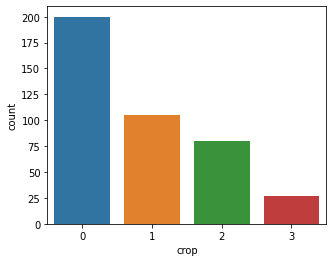

In [ ]:
plt.figure(figsize=(5, 4))

sns.countplot(x=y_test)

In [ ]:
x_test, y_test = sm.fit_resample(x_test, y_test)

y_test.value_counts()

2    200
0    200
3    200
1    200
Name: crop, dtype: int64

## Model Building

## Logistic reg

In [ ]:
parameters = {'C': [1, 2, 3, 4, 5, 10]}

Logistic_Regression = GridSearchCV(
    LogisticRegression(multi_class='multinomial'), param_grid=parameters, cv=5, n_jobs=-1)
Logistic_Regression.fit(x_train, y_train)

print(f'The best parameters are {Logistic_Regression .best_params_}\n')
print(f'The best score is {Logistic_Regression .best_score_}')

The best parameters are {'C': 10}

The best score is 0.4556774694248936


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf = Logistic_Regression.best_estimator_

Logistic_Regression_train_accuracy = accuracy_score(
    y_train, clf.predict(x_train))
Logistic_Regression_test_accuracy = accuracy_score(y_test, clf.predict(x_test))


print(
    f'Training Accuracy of Logistic_Regression is {Logistic_Regression_train_accuracy}\n')
print(
    f'Test Accuracy of Logistic_Regression is {Logistic_Regression_test_accuracy } \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

Training Accuracy of Logistic_Regression is 0.4653716216216216

Test Accuracy of Logistic_Regression is 0.445 

Confusion Matrix :- 
[[112  39  25  24]
 [ 13 115  41  31]
 [  8  70  57  65]
 [ 15  60  53  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.76      0.56      0.64       200
           1       0.40      0.57      0.48       200
           2       0.32      0.28      0.30       200
           3       0.38      0.36      0.37       200

    accuracy                           0.45       800
   macro avg       0.47      0.44      0.45       800
weighted avg       0.47      0.45      0.45       800



### DecisionTreeClassifier

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 5, 7], }

Decision_tree_clf = GridSearchCV(
    DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
Decision_tree_clf.fit(x_train, y_train)

print(f'The best parameters are {Decision_tree_clf .best_params_}\n')
print(f'The best score is {Decision_tree_clf .best_score_}')

The best parameters are {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

The best score is 0.8437757022684901


In [ ]:
clf = Decision_tree_clf.best_estimator_

Decision_tree_clf_train_accuracy = accuracy_score(
    y_train, clf.predict(x_train))
Decision_tree_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(
    f'Training Accuracy of Decision_tree_clf is {Decision_tree_clf_train_accuracy}\n')
print(
    f'Test Accuracy of Decision_tree_clf is {Decision_tree_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

Training Accuracy of Decision_tree_clf is 0.8521959459459459

Test Accuracy of Decision_tree_clf is 0.815 

Confusion Matrix :- 
[[200   0   0   0]
 [  0 187   4   9]
 [  0  47  65  88]
 [  0   0   0 200]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.80      0.94      0.86       200
           2       0.94      0.33      0.48       200
           3       0.67      1.00      0.80       200

    accuracy                           0.81       800
   macro avg       0.85      0.82      0.79       800
weighted avg       0.85      0.81      0.79       800



### KNN

In [ ]:
n = list(range(1, 30))

parameters = {'n_neighbors': n}

knn_clf = GridSearchCV(KNeighborsClassifier(),
                       param_grid=parameters, cv=5, n_jobs=-1)
knn_clf.fit(x_train, y_train)

print(f'The best parameters are {knn_clf .best_params_}\n')
print(f'The best score is {knn_clf .best_score_}')

The best parameters are {'n_neighbors': 1}

The best score is 0.6170275019848173


In [ ]:
clf = knn_clf.best_estimator_

knn_clf_train_accuracy = accuracy_score(y_train, clf.predict(x_train))
knn_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f'Training Accuracy of knn_clf is {knn_clf_train_accuracy}\n')
print(f'Test Accuracy of knn_clf is {knn_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

Training Accuracy of knn_clf is 0.957347972972973

Test Accuracy of knn_clf is 0.29625 

Confusion Matrix :- 
[[124  34  28  14]
 [ 35  69  74  22]
 [ 43  52  24  81]
 [ 50  35  95  20]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.49      0.62      0.55       200
           1       0.36      0.34      0.35       200
           2       0.11      0.12      0.11       200
           3       0.15      0.10      0.12       200

    accuracy                           0.30       800
   macro avg       0.28      0.30      0.28       800
weighted avg       0.28      0.30      0.28       800



### Random Forest

In [ ]:
parameters = {'n_estimators': [10, 17, 25, 33, 41, 48],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'min_samples_split': [2, 3, 4]}

Random_forest_clf = GridSearchCV(
    RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
Random_forest_clf.fit(x_train, y_train)

print(f'The best parameters are {Random_forest_clf .best_params_}\n')
print(f'The best score is {Random_forest_clf .best_score_}')

The best parameters are {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 33}

The best score is 0.8209757272459658


In [ ]:
clf = Random_forest_clf.best_estimator_

Random_forest_clf_train_accuracy = accuracy_score(
    y_train, clf.predict(x_train))
Random_forest_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(
    f'Training Accuracy of Random_forest_clf is {Random_forest_clf_train_accuracy}\n')
print(
    f'Test Accuracy of Random_forest_clf is {Random_forest_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

Training Accuracy of Random_forest_clf is 0.8521959459459459

Test Accuracy of Random_forest_clf is 0.7725 

Confusion Matrix :- 
[[200   0   0   0]
 [  0 195   3   2]
 [  0  56  61  83]
 [  0  12  26 162]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.74      0.97      0.84       200
           2       0.68      0.30      0.42       200
           3       0.66      0.81      0.72       200

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.75       800
weighted avg       0.77      0.77      0.75       800



svm


In [ ]:
parameters = {'C':[1,2,3],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}


svm_clf = GridSearchCV(SVC(), param_grid=parameters, cv=5, n_jobs=-1)
svm_clf.fit(x_train,y_train)

print(f'The best parameters are {svm_clf .best_params_}\n')
print(f'The best score is {svm_clf .best_score_}')

In [ ]:
clf_svm = svm_clf.best_estimator_

svm_clf_train_accuracy = accuracy_score(y_train, clf_svm.predict(x_train))
svm_clf_test_accuracy = accuracy_score(y_test, clf_svm.predict(x_test))

print(
    f'Training Accuracy of svm_clf is {svm_clf_train_accuracy}\n')
print(
    f'Test Accuracy of svm_clf is {svm_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf_svm.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf_svm.predict(x_test))}')

naive bayes

In [ ]:
parameters = {'alpha' : [1,2]}

mnb_clf = GridSearchCV(
    MultinomialNB(), param_grid=parameters, cv=5, n_jobs=-1)
mnb_clf.fit(x_train, y_train)

print(f'The best parameters are {mnb_clf.best_params_}\n')
print(f'The best score is {mnb_clf.best_score_}')

In [ ]:
clf_mnb = mnb_clf.best_estimator_

mnb_clf_train_accuracy = accuracy_score(y_train, clf_mnb.predict(x_train))
mnb_clf_test_accuracy = accuracy_score(y_test, clf_mnb.predict(x_test))

print(
    f'Training Accuracy of Random_forest_clf is {mnb_clf_train_accuracy }\n')
print(
    f'Test Accuracy of Random_forest_clf is {mnb_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf_mnb.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf_mnb.predict(x_test))}')

sgd

In [ ]:
parameters = {'loss':['hinge','squared_error'], 'penalty':['l2']}

sgd_clf = GridSearchCV(
    SGDClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
sgd_clf.fit(x_train, y_train)

print(f'The best parameters are {sgd_clf.best_params_}\n')
print(f'The best score is {sgd_clf.best_score_}')

In [ ]:
clf_sgd = sgd_clf.best_estimator_

sgd_clf_train_accuracy = accuracy_score(y_train, clf_sgd.predict(x_train))
sgd_clf_test_accuracy = accuracy_score(y_test, clf_sgd.predict(x_test))

print(
    f'Training Accuracy of Random_forest_clf is {sgd_clf_train_accuracy }\n')
print(
    f'Test Accuracy of Random_forest_clf is {sgd_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf_sgd.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf_sgd.predict(x_test))}')

### Xgboost

In [ ]:
parameters = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25],
              'max_depth': [2, 3, 4, 5, 6, 8, 9],
              'min_child_weight': [1, 3, 4, 5, 7],
              'gamma': [0.3, 0.4, 0.5, 0.7]}

xgboost_clf = GridSearchCV(
    XGBClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
xgboost_clf.fit(x_train, y_train)

print(f'The best parameters are {xgboost_clf .best_params_}\n')
print(f'The best score is {xgboost_clf .best_score_}')

In [ ]:
clf = xgboost_clf.best_estimator_

xgboost_clf_train_accuracy = accuracy_score(y_train, clf.predict(x_train))
xgboost_clf_test_accuracy = accuracy_score(y_test, clf.predict(x_test))

print(f'Training Accuracy of xgboost_clf is {xgboost_clf_train_accuracy}\n')
print(f'Test Accuracy of xgboost_clf is {xgboost_clf_test_accuracy} \n')

print(
    f'Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(x_test))}\n')
print(
    f'Classification Report :- \n {classification_report(y_test, clf.predict(x_test))}')

ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()

final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
 
final_model.fit(x_train, y_train)


pred_final = final_model.predict(x_test)

In [ ]:
from sklearn.metrics import log_loss

print(log_loss(y_test, pred_final))

## Model_comparision

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'XgBoost','Support vector machine','Naive Bayes','Stocastic gradient descent'],
    'Train_Score': [Logistic_Regression_train_accuracy, knn_clf_train_accuracy, Decision_tree_clf_train_accuracy, Random_forest_clf_train_accuracy, xgboost_clf_train_accuracy,svm_clf_train_accuracy, mnb_clf_train_accuracy, sgd_clf_train_accuracy ],
    'Test_Score': [Logistic_Regression_test_accuracy, knn_clf_test_accuracy, Decision_tree_clf_test_accuracy, Random_forest_clf_test_accuracy, xgboost_clf_test_accuracy,svm_clf_test_accuracy, mnb_clf_test_accuracy, sgd_clf_test_accuracy ]
})


model_compare = models.sort_values(by='Test_Score', ascending=False)
model_compare

ANN


In [ ]:
import tensorflow as tf
import keras

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])


In [ ]:
ann.fit(x_train, y_train,batch_size=32,epochs = 100)